In [165]:
### Boom Bike Assignment 

from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import scipy as sp

import statsmodels.api as sm
import statsmodels.tsa.api as smt
%matplotlib inline

In [166]:
import warnings
warnings.filterwarnings('ignore')

In [167]:
# data is the day.csv file
data = pd.read_csv("day.csv")

# del df['Age']
data = data.drop(['instant','dteday','mnth','temp','casual','registered'], axis=1)

In [168]:
# Check the head of the dataset
data.head()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,0,3,1,1,11.46350,43.6957,12.522300,1600


In [169]:
data.shape

(730, 10)

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 57.2 KB


In [171]:
data.describe()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,0.028767,2.997260,0.683562,1.394521,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,0.167266,2.006161,0.465405,0.544807,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,0.000000,3.000000,1.000000,1.000000,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,0.000000,5.000000,1.000000,2.000000,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,1.000000,6.000000,1.000000,3.000000,42.044800,97.250000,34.000021,8714.000000


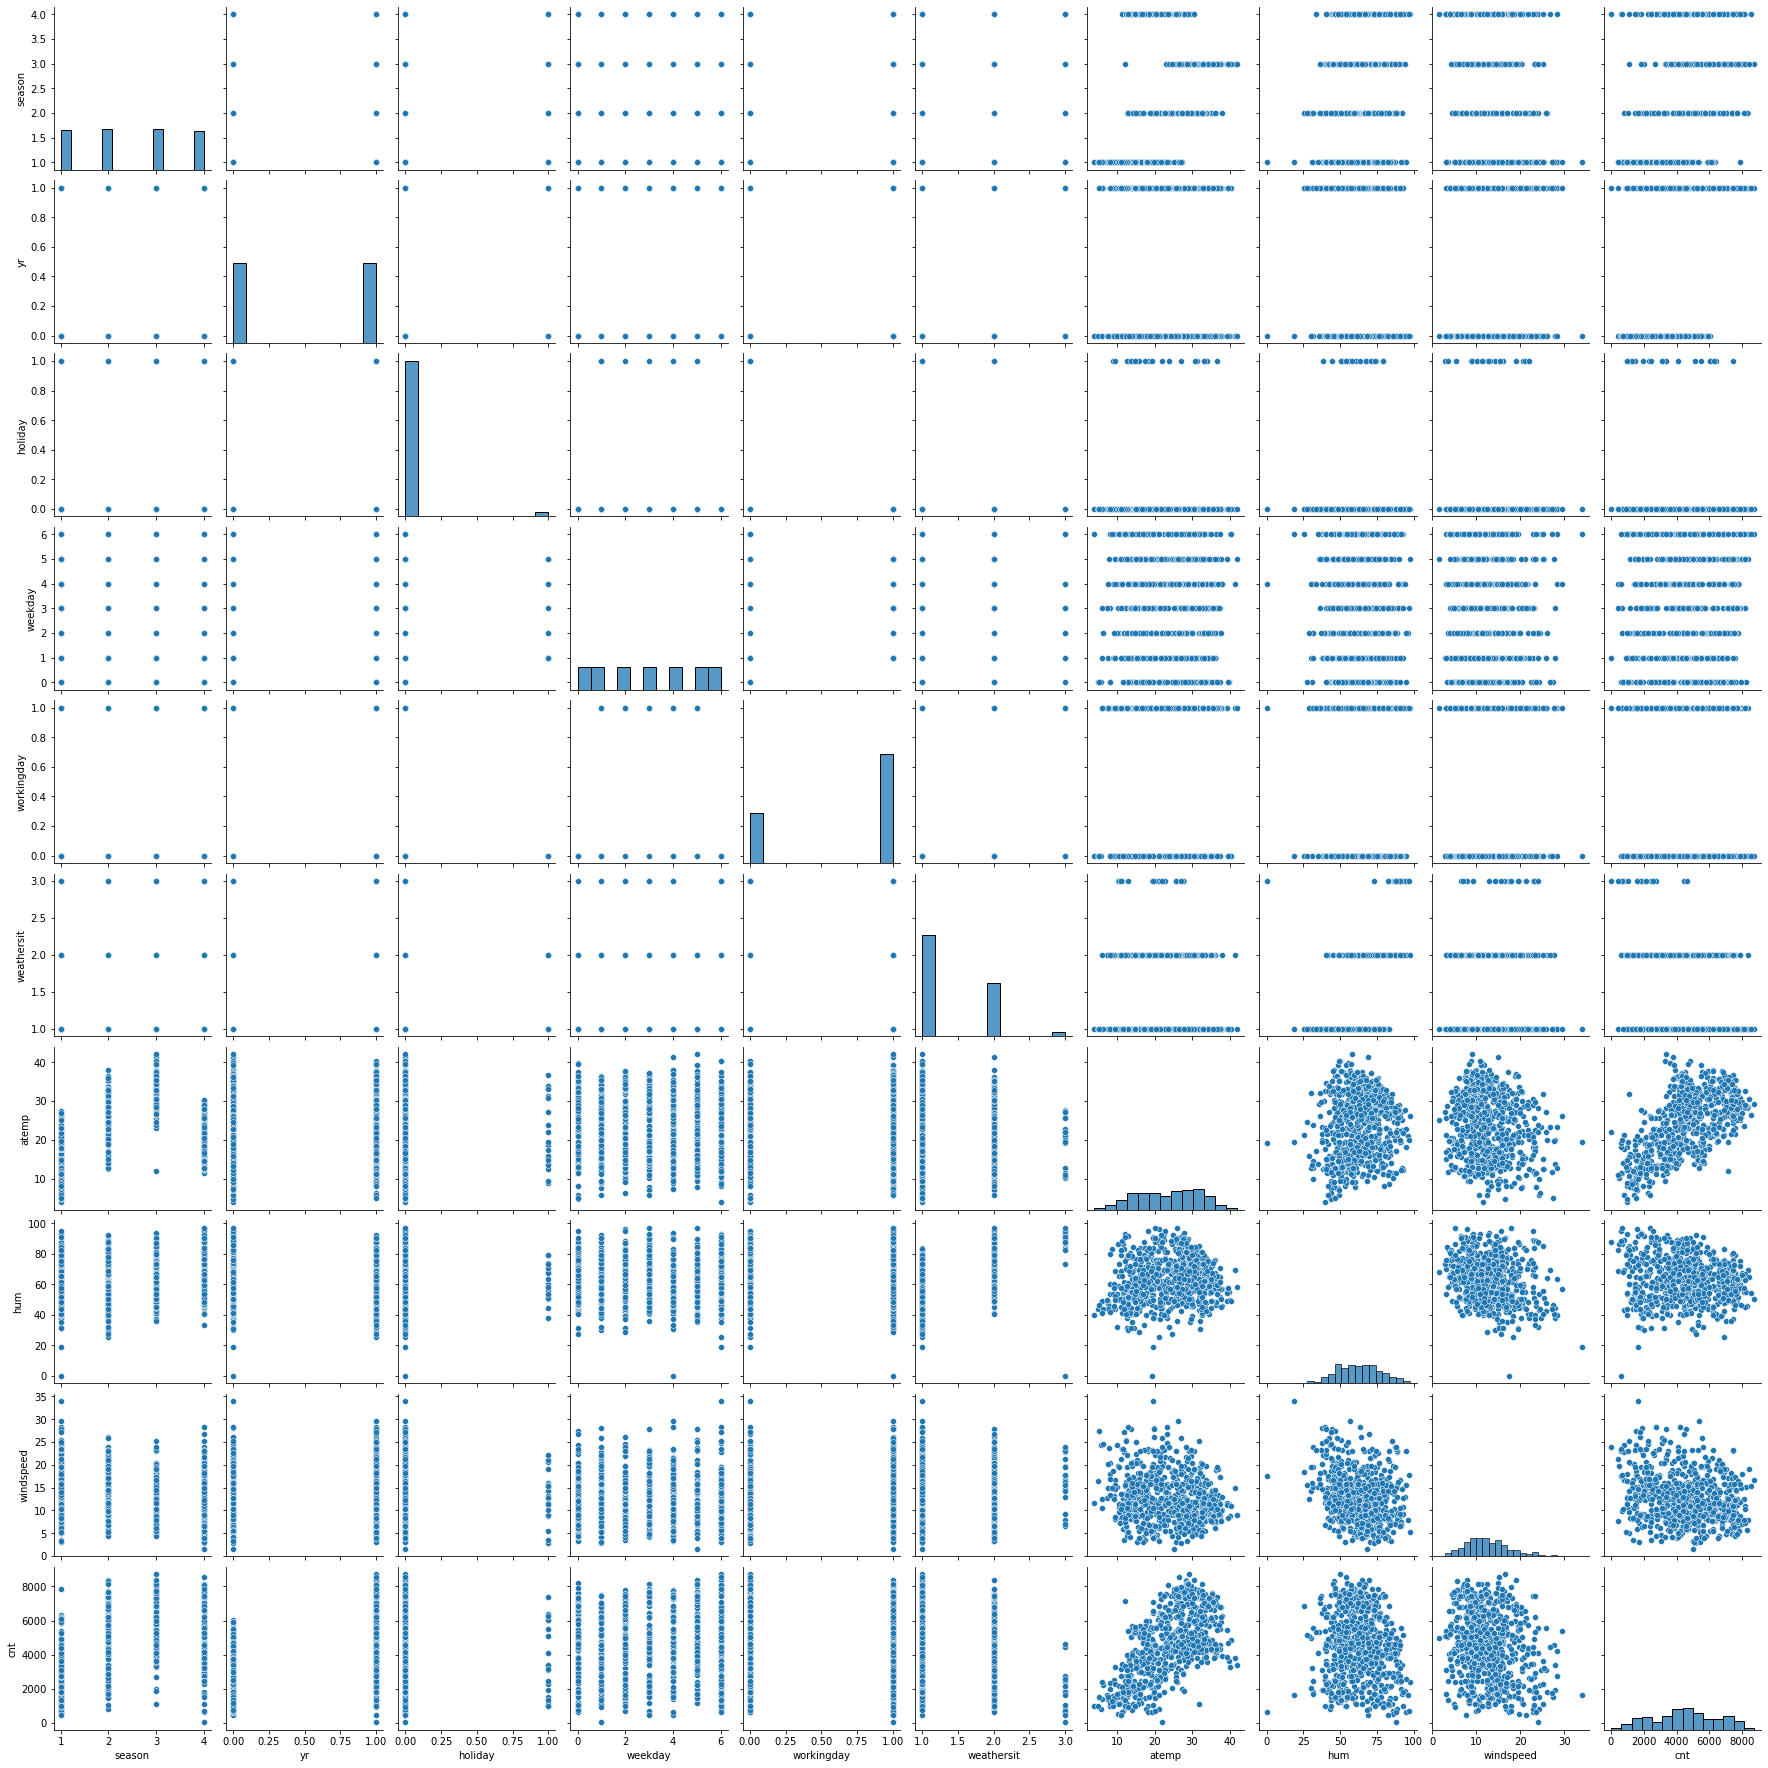

In [172]:
### Visualising the Data by using pairplot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data)
plt.show()

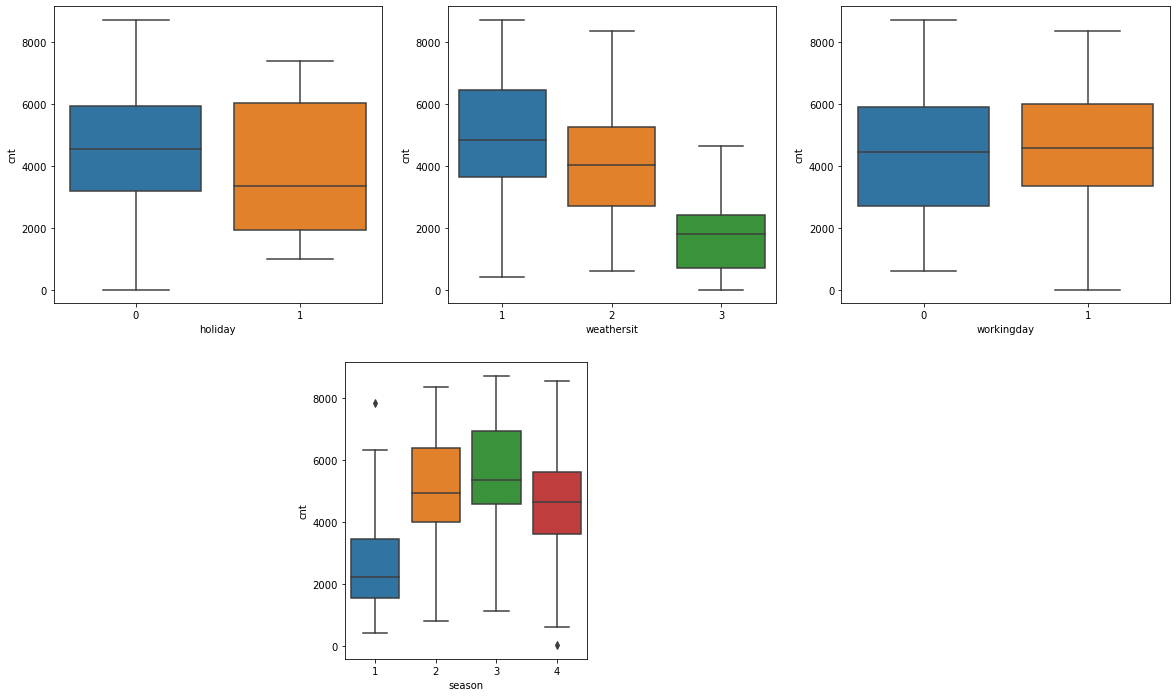

In [173]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.show()

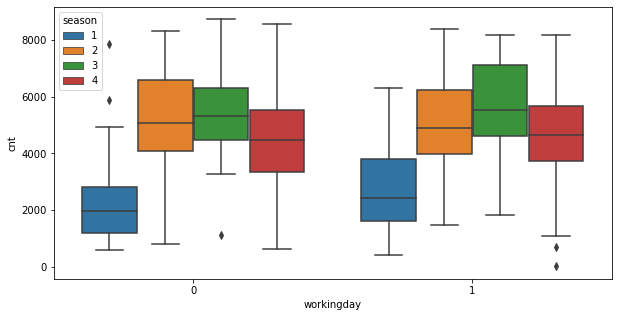

In [174]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', hue = 'season', data = data)
plt.show()

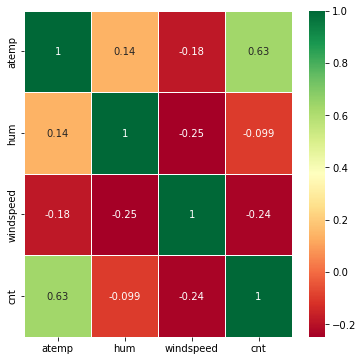

In [175]:
# Checking correlation of the parameters by mapping a correlation heatmap

plt.figure(figsize = (6,6))
bike_num = data[['atemp','hum','windspeed','cnt']]
ax = sns.heatmap(bike_num.corr(), annot = True, cmap="RdYlGn",linewidth =1)

In [176]:
## Dummy Variables
## The variable season has four  levels. We need to convert these levels into integer as well.
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'

status = pd.get_dummies(data['season'])
data.add_prefix('season_')
# Check what the dataset 'status' looks like
data.head()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,0,3,1,1,11.46350,43.6957,12.522300,1600


In [177]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(data['season'],prefix = 'season', drop_first = True)


In [178]:
# Add the results to the original housing dataframe

data = pd.concat([data, status], axis = 1)

# Now let's see the head of our dataframe.

data.head()


,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,season_2,season_3,season_4
0,1,0,0,6,0,2,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,0,0,0,2,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,0,1,1,1,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,0,2,1,1,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,0,3,1,1,11.46350,43.6957,12.522300,1600,0,0,0


In [179]:
# Drop 'furnishingstatus' as we have created the dummies for it

data.drop(['season'], axis = 1, inplace = True)
data.head()

,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,season_2,season_3,season_4
0,0,0,6,0,2,18.18125,80.5833,10.749882,985,0,0,0
1,0,0,0,0,2,17.68695,69.6087,16.652113,801,0,0,0
2,0,0,1,1,1,9.47025,43.7273,16.636703,1349,0,0,0
3,0,0,2,1,1,10.60610,59.0435,10.739832,1562,0,0,0
4,0,0,3,1,1,11.46350,43.6957,12.522300,1600,0,0,0


In [180]:
## Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [181]:
## We will use MinMax scaling.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['holiday', 'weekday', 'workingday', 'weathersit', 'atemp','hum','windspeed','cnt']

data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

data_train.head()


,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,season_2,season_3,season_4
653,1,0.0,0.333333,1.0,0.0,0.501133,0.575354,0.300794,0.864243,0,0,1
576,1,0.0,0.333333,1.0,0.0,0.766351,0.725633,0.264686,0.827658,0,1,0
426,1,0.0,1.000000,0.0,0.5,0.438975,0.640189,0.255342,0.465255,0,0,0
728,1,0.0,0.000000,0.0,0.0,0.200348,0.498067,0.663106,0.204096,0,0,0
482,1,0.0,1.000000,0.0,0.5,0.391735,0.504508,0.188475,0.482973,1,0,0


In [182]:
data_test.head()

,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,season_2,season_3,season_4
184,0,1,1,0,2,33.27085,63.7917,5.459106,6043,0,1,0
535,1,0,3,1,1,36.04875,59.2083,7.625404,6211,1,0,0
299,0,0,4,1,2,22.85230,81.2917,13.250121,2659,0,0,1
221,0,0,3,1,1,34.24915,42.4167,13.417286,4780,0,1,0
152,0,0,4,1,1,32.19710,30.5000,19.583229,4968,1,0,0


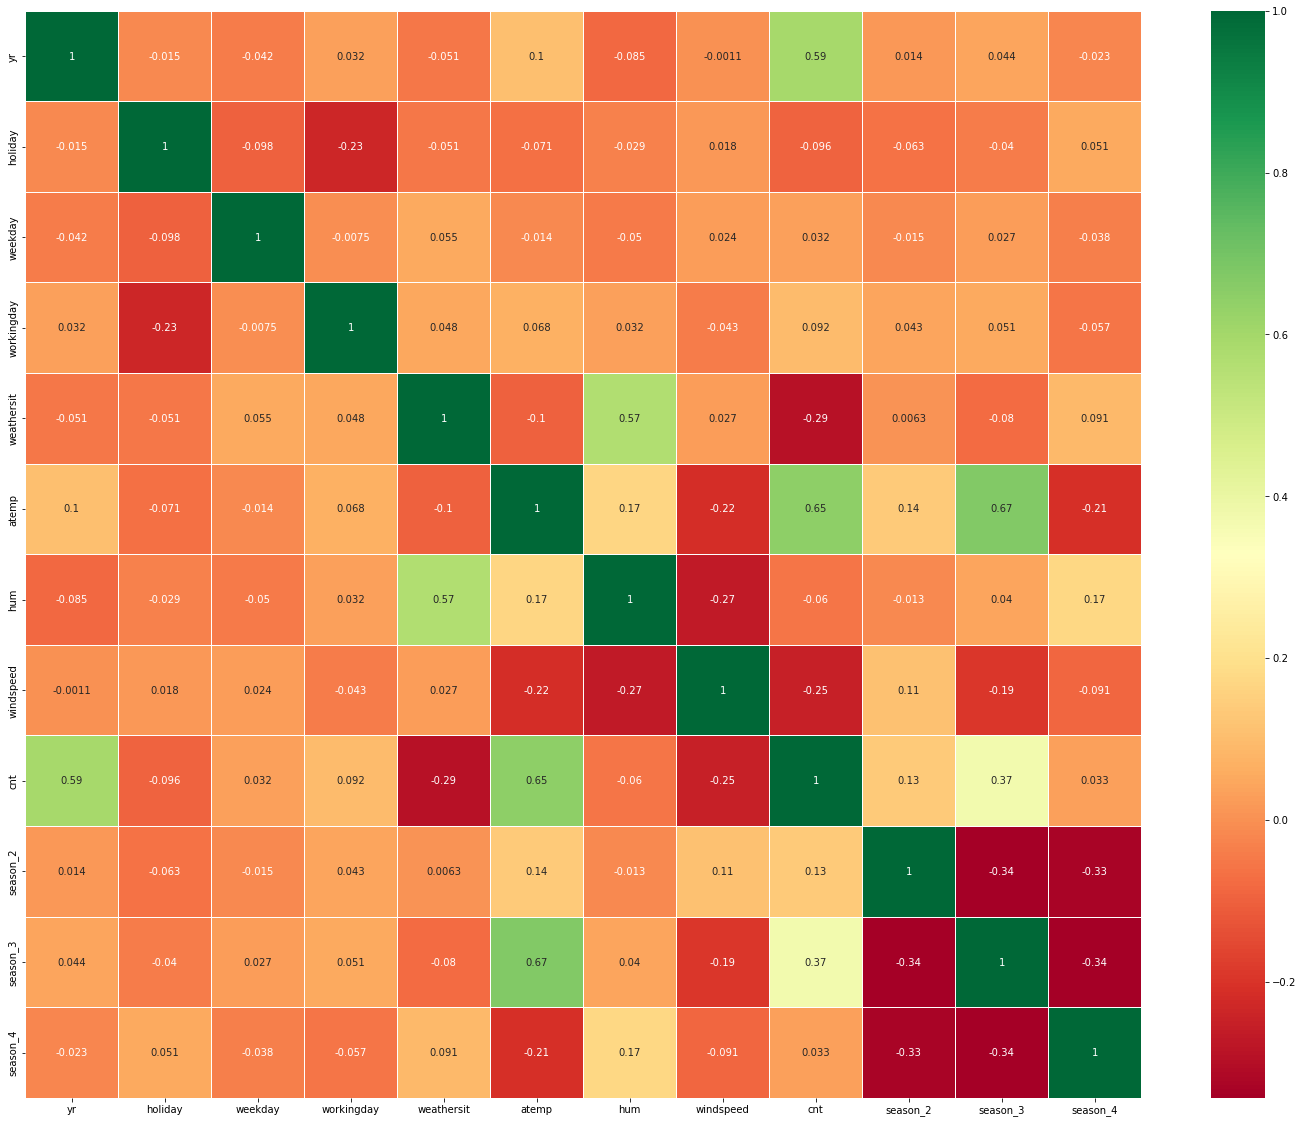

In [183]:
plt.figure(figsize = (25,20))
ax = sns.heatmap(data_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [184]:
## Dividing into X and Y sets for the model building
y_train = data_train.pop('cnt')
X_train = data_train

In [185]:
## Recursive feature elimination
## LinearRegression function from SciKit Learn for its compatibility with RFE

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [186]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [187]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 2),
 ('weathersit', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1)]

In [188]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'weekday', 'weathersit', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4'],
      dtype='object')

In [189]:
X_train.columns[~rfe.support_]

Index(['workingday'], dtype='object')

In [190]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [191]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [192]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [193]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     230.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.01e-180
Time:                        20:06:39   Log-Likelihood:                 479.03
No. Observations:                 510   AIC:                            -936.1
Df Residuals:                     499   BIC:                            -889.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1853      0.030      6.233      0.0

In [194]:
## Bholiday is insignificant in presence of other variables; can be dropped
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [195]:
## Rebuilding the model without holiday
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [196]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [197]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     252.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.01e-179
Time:                        20:06:39   Log-Likelihood:                 475.45
No. Observations:                 510   AIC:                            -930.9
Df Residuals:                     500   BIC:                            -888.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1802      0.030      6.039      0.0

In [198]:
X_train_new.columns

Index(['const', 'yr', 'weekday', 'weathersit', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4'],
      dtype='object')

In [199]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [200]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,21.46
4,hum,15.73
7,season_3,5.93
5,windspeed,3.70
6,season_2,3.29
1,weekday,2.98
8,season_4,2.47
2,weathersit,2.19
0,yr,2.01


In [201]:
## Residual Analysis of the train data
## To check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.
y_train_price = lm.predict(X_train_lm)

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

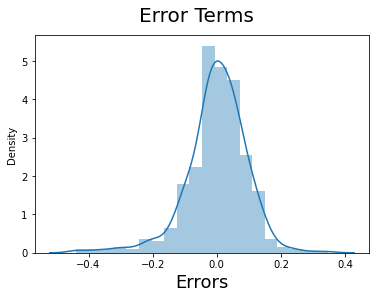

In [202]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [203]:
## Making Predictions
## Applying the scaling on the test sets
data_test.head()

num_vars = ['yr','weekday','weathersit','atemp','hum','windspeed','season_2','cnt']

data_test[num_vars] = scaler.transform(data_test[num_vars])

In [204]:
data_train.head()

,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,season_2,season_3,season_4
653,1,0.0,0.333333,1.0,0.0,0.501133,0.575354,0.300794,0,0,1
576,1,0.0,0.333333,1.0,0.0,0.766351,0.725633,0.264686,0,1,0
426,1,0.0,1.000000,0.0,0.5,0.438975,0.640189,0.255342,0,0,0
728,1,0.0,0.000000,0.0,0.0,0.200348,0.498067,0.663106,0,0,0
482,1,0.0,1.000000,0.0,0.5,0.391735,0.504508,0.188475,1,0,0


In [205]:
# Now let's use our model to make predictions.

## Dividing into X and Y sets for the model building
y_test = data_test.pop('cnt')
X_test = data_test

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [206]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

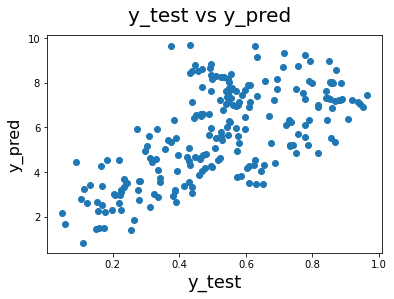

In [207]:
## Model Evaluation
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [208]:
## Recursive feature elimination
## LinearRegression function from SciKit Learn for its compatibility with RFE

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm_test = LinearRegression()
lm_test.fit(X_test,y_test)

rfe = RFE(lm_test, 10)             # running RFE
rfe = rfe.fit(X_test,y_test)

In [209]:
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 2),
 ('weathersit', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1)]

In [210]:
col = X_test.columns[rfe.support_]
col

Index(['yr', 'holiday', 'weekday', 'weathersit', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4'],
      dtype='object')

In [211]:
X_test.columns[~rfe.support_]

Index(['workingday'], dtype='object')

In [212]:
# Creating X_test dataframe with RFE selected variables
X_test_rfe = X_test[col]

In [213]:
# Adding a constant variable 
import statsmodels.api as sm  
X_test_rfe = sm.add_constant(X_test_rfe)

In [214]:
lm_test = sm.OLS(y_test,X_test_rfe).fit()   # Running the linear model

In [215]:
#Let's see the summary of our linear model
print(lm_test.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     96.47
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           1.89e-72
Time:                        20:06:40   Log-Likelihood:                 212.30
No. Observations:                 219   AIC:                            -402.6
Df Residuals:                     208   BIC:                            -365.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6212      0.089      6.966      0.0

In [216]:
## holiday is insignificant in presence of other variables; can be dropped
X_test_new = X_test_rfe.drop(["holiday"], axis = 1)

In [217]:
X_test_new.columns

Index(['const', 'yr', 'weekday', 'weathersit', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4'],
      dtype='object')

In [218]:
X_test_new = X_test_new.drop(['const'], axis=1)

In [219]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_test_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,33.58
6,season_2,24.41
2,weathersit,15.02
3,atemp,13.01
5,windspeed,8.03
1,weekday,3.29
7,season_3,2.87
0,yr,2.05
8,season_4,1.94


In [220]:
## Rebuilding the model without holiday
# Adding a constant variable 
import statsmodels.api as sm  
X_test_lm = sm.add_constant(X_test_new)

In [221]:
## Comparison of Test Vs Train

## R-squared Test   :                     0.823
## R-squared Train  :                     0.820
    
## Adj. R-squared Test:                   0.814
## Adj. R-squared Train:                  0.817

## Main factors influencing the demand 

## atemp shows linear distribution 
## season 2 and 3 have a higher median on both working and non working days 
## It indicates that these seasons can be a good predictor of the dependent variable.
    
    
    
    
    